In [43]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas_datareader as pdr

In [44]:
key='8b33ec8bc52c69c9db0e0fb75617a11787f0ab53'
data=pdr.get_data_tiingo('GOOGL',api_key=key)

/opt/conda/lib/python3.7/site-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [45]:
data

close      high      low     open  \
symbol date                                                             
GOOGL  2017-07-10 00:00:00+00:00   951.00   953.130   941.95   941.95   
       2017-07-11 00:00:00+00:00   953.53   954.890   945.12   950.52   
       2017-07-12 00:00:00+00:00   967.66   969.630   957.04   960.86   
       2017-07-13 00:00:00+00:00   968.85   978.700   964.80   970.80   
       2017-07-14 00:00:00+00:00   976.91   977.540   970.15   974.00   
...                                   ...       ...      ...      ...   
       2022-06-30 00:00:00+00:00  2179.26  2217.760  2135.00  2200.00   
       2022-07-01 00:00:00+00:00  2174.75  2185.000  2134.61  2158.66   
       2022-07-05 00:00:00+00:00  2265.26  2267.535  2114.63  2142.01   
       2022-07-06 00:00:00+00:00  2291.44  2311.790  2229.52  2266.04   
       2022-07-07 00:00:00+00:00  2375.66  2383.790  2296.67  2301.60   

                                   volume  adjClose   adjHigh   adjLow  \
symbol date                                                              
GOOGL  2017-07-10 00:00:00+00:00  1409850    951.00   953.130   941.95   
       2017-07-11 00:00:00+00:00  1444540    953.53   954.890   945.12   
       2017-07-12 00:00:00+00:00  1589548    967.66   969.630   957.04   
       2017-07-13 00:00:00+00:00  1519987    968.85   978.700   964.80   
       2017-07-14 00:00:00+00:00  1048240    976.91   977.540   970.15   
...                                   ...       ...       ...      ...   
       2022-06-30 00:00:00+00:00  2158453   2179.26  2217.760  2135.00   
       2022-07-01 00:00:00+00:00  1773783   2174.75  2185.000  2134.61   
       2022-07-05 00:00:00+00:00  1969982   2265.26  2267.535  2114.63   
       2022-07-06 00:00:00+00:00  1871569   2291.44  2311.790  2229.52   
       2022-07-07 00:00:00+00:00  2046794   2375.66  2383.790  2296.67   

                                  adjOpen  adjVolume  divCash  splitFactor  
symbol date                                                                 
GOOGL  2017-07-10 00:00:00+00:00   941.95    1409850      0.0          1.0  
       2017-07-11 00:00:00+00:00   950.52    1444540      0.0          1.0  
       2017-07-12 00:00:00+00:00   960.86    1589548      0.0          1.0  
       2017-07-13 00:00:00+00:00   970.80    1519987      0.0          1.0  
       2017-07-14 00:00:00+00:00   974.00    1048240      0.0          1.0  
...                                   ...        ...      ...          ...  
       2022-06-30 00:00:00+00:00  2200.00    2158453      0.0          1.0  
       2022-07-01 00:00:00+00:00  2158.66    1773783      0.0          1.0  
       2022-07-05 00:00:00+00:00  2142.01    1969982      0.0          1.0  
       2022-07-06 00:00:00+00:00  2266.04    1871569      0.0          1.0  
       2022-07-07 00:00:00+00:00  2301.60    2046794      0.0          1.0  

[1258 rows x 12 columns]

In [46]:
data.tail()

close      high      low     open  \
symbol date                                                             
GOOGL  2022-06-30 00:00:00+00:00  2179.26  2217.760  2135.00  2200.00   
       2022-07-01 00:00:00+00:00  2174.75  2185.000  2134.61  2158.66   
       2022-07-05 00:00:00+00:00  2265.26  2267.535  2114.63  2142.01   
       2022-07-06 00:00:00+00:00  2291.44  2311.790  2229.52  2266.04   
       2022-07-07 00:00:00+00:00  2375.66  2383.790  2296.67  2301.60   

                                   volume  adjClose   adjHigh   adjLow  \
symbol date                                                              
GOOGL  2022-06-30 00:00:00+00:00  2158453   2179.26  2217.760  2135.00   
       2022-07-01 00:00:00+00:00  1773783   2174.75  2185.000  2134.61   
       2022-07-05 00:00:00+00:00  1969982   2265.26  2267.535  2114.63   
       2022-07-06 00:00:00+00:00  1871569   2291.44  2311.790  2229.52   
       2022-07-07 00:00:00+00:00  2046794   2375.66  2383.790  2296.67   

                                  adjOpen  adjVolume  divCash  splitFactor  
symbol date                                                                 
GOOGL  2022-06-30 00:00:00+00:00  2200.00    2158453      0.0          1.0  
       2022-07-01 00:00:00+00:00  2158.66    1773783      0.0          1.0  
       2022-07-05 00:00:00+00:00  2142.01    1969982      0.0          1.0  
       2022-07-06 00:00:00+00:00  2266.04    1871569      0.0          1.0  
       2022-07-07 00:00:00+00:00  2301.60    2046794      0.0          1.0

In [47]:
data.to_csv('GOOGL.csv')
data.head()

close    high     low    open   volume  \
symbol date                                                                 
GOOGL  2017-07-10 00:00:00+00:00  951.00  953.13  941.95  941.95  1409850   
       2017-07-11 00:00:00+00:00  953.53  954.89  945.12  950.52  1444540   
       2017-07-12 00:00:00+00:00  967.66  969.63  957.04  960.86  1589548   
       2017-07-13 00:00:00+00:00  968.85  978.70  964.80  970.80  1519987   
       2017-07-14 00:00:00+00:00  976.91  977.54  970.15  974.00  1048240   

                                  adjClose  adjHigh  adjLow  adjOpen  \
symbol date                                                            
GOOGL  2017-07-10 00:00:00+00:00    951.00   953.13  941.95   941.95   
       2017-07-11 00:00:00+00:00    953.53   954.89  945.12   950.52   
       2017-07-12 00:00:00+00:00    967.66   969.63  957.04   960.86   
       2017-07-13 00:00:00+00:00    968.85   978.70  964.80   970.80   
       2017-07-14 00:00:00+00:00    976.91   977.54  970.15   974.00   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
GOOGL  2017-07-10 00:00:00+00:00    1409850      0.0          1.0  
       2017-07-11 00:00:00+00:00    1444540      0.0          1.0  
       2017-07-12 00:00:00+00:00    1589548      0.0          1.0  
       2017-07-13 00:00:00+00:00    1519987      0.0          1.0  
       2017-07-14 00:00:00+00:00    1048240      0.0          1.0

In [48]:
data=pd.read_csv('GOOGL.csv',date_parser=True)
data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOGL,2017-07-10 00:00:00+00:00,951.00,953.13,941.95,941.95,1409850,951.00,953.13,941.95,941.95,1409850,0.0,1.0
1,GOOGL,2017-07-11 00:00:00+00:00,953.53,954.89,945.12,950.52,1444540,953.53,954.89,945.12,950.52,1444540,0.0,1.0
2,GOOGL,2017-07-12 00:00:00+00:00,967.66,969.63,957.04,960.86,1589548,967.66,969.63,957.04,960.86,1589548,0.0,1.0
3,GOOGL,2017-07-13 00:00:00+00:00,968.85,978.70,964.80,970.80,1519987,968.85,978.70,964.80,970.80,1519987,0.0,1.0
4,GOOGL,2017-07-14 00:00:00+00:00,976.91,977.54,970.15,974.00,1048240,976.91,977.54,970.15,974.00,1048240,0.0,1.0


In [49]:
data=data.drop(columns=['symbol','adjClose','adjHigh','adjLow','adjOpen','adjVolume','divCash','splitFactor'],axis=1)
data.head()

,date,close,high,low,open,volume
0,2017-07-10 00:00:00+00:00,951.00,953.13,941.95,941.95,1409850
1,2017-07-11 00:00:00+00:00,953.53,954.89,945.12,950.52,1444540
2,2017-07-12 00:00:00+00:00,967.66,969.63,957.04,960.86,1589548
3,2017-07-13 00:00:00+00:00,968.85,978.70,964.80,970.80,1519987
4,2017-07-14 00:00:00+00:00,976.91,977.54,970.15,974.00,1048240


In [50]:
data.tail()

,date,close,high,low,open,volume
1253,2022-06-30 00:00:00+00:00,2179.26,2217.760,2135.00,2200.00,2158453
1254,2022-07-01 00:00:00+00:00,2174.75,2185.000,2134.61,2158.66,1773783
1255,2022-07-05 00:00:00+00:00,2265.26,2267.535,2114.63,2142.01,1969982
1256,2022-07-06 00:00:00+00:00,2291.44,2311.790,2229.52,2266.04,1871569
1257,2022-07-07 00:00:00+00:00,2375.66,2383.790,2296.67,2301.60,2046794


In [51]:
data_training=data[data['date']<'2021-01-01']
data_training

,date,close,high,low,open,volume
0,2017-07-10 00:00:00+00:00,951.00,953.13,941.95,941.95,1409850
1,2017-07-11 00:00:00+00:00,953.53,954.89,945.12,950.52,1444540
2,2017-07-12 00:00:00+00:00,967.66,969.63,957.04,960.86,1589548
3,2017-07-13 00:00:00+00:00,968.85,978.70,964.80,970.80,1519987
4,2017-07-14 00:00:00+00:00,976.91,977.54,970.15,974.00,1048240
...,...,...,...,...,...,...
873,2020-12-24 00:00:00+00:00,1734.16,1742.41,1724.35,1729.00,465638
874,2020-12-28 00:00:00+00:00,1773.96,1787.00,1741.82,1744.91,1379642
875,2020-12-29 00:00:00+00:00,1757.76,1788.47,1755.11,1787.23,986287
876,2020-12-30 00:00:00+00:00,1736.25,1767.76,1728.00,1765.00,1051308


In [52]:
data_test=data[data['date']>'2021-01-01']
data_test

,date,close,high,low,open,volume
878,2021-01-04 00:00:00+00:00,1726.13,1762.4899,1707.1400,1760.000,1866195
879,2021-01-05 00:00:00+00:00,1740.05,1746.8300,1716.9000,1725.090,1017962
880,2021-01-06 00:00:00+00:00,1722.88,1743.9650,1696.1014,1700.255,2329401
881,2021-01-07 00:00:00+00:00,1774.34,1777.8200,1726.7600,1726.760,2096829
882,2021-01-08 00:00:00+00:00,1797.83,1799.3550,1761.2200,1777.160,1774226
...,...,...,...,...,...,...
1253,2022-06-30 00:00:00+00:00,2179.26,2217.7600,2135.0000,2200.000,2158453
1254,2022-07-01 00:00:00+00:00,2174.75,2185.0000,2134.6100,2158.660,1773783
1255,2022-07-05 00:00:00+00:00,2265.26,2267.5350,2114.6300,2142.010,1969982
1256,2022-07-06 00:00:00+00:00,2291.44,2311.7900,2229.5200,2266.040,1871569


In [53]:
training_data=data_training.drop(columns='date',axis=1)
training_data

,close,high,low,open,volume
0,951.00,953.13,941.95,941.95,1409850
1,953.53,954.89,945.12,950.52,1444540
2,967.66,969.63,957.04,960.86,1589548
3,968.85,978.70,964.80,970.80,1519987
4,976.91,977.54,970.15,974.00,1048240
...,...,...,...,...,...
873,1734.16,1742.41,1724.35,1729.00,465638
874,1773.96,1787.00,1741.82,1744.91,1379642
875,1757.76,1788.47,1755.11,1787.23,986287
876,1736.25,1767.76,1728.00,1765.00,1051308


In [54]:
scaler=MinMaxScaler()
training_data=scaler.fit_transform(training_data)
training_data

array([[0.03332596, 0.02717403, 0.02599065, 0.02442843, 0.15245905],
       [0.03612432, 0.02909631, 0.02951915, 0.03394441, 0.15806034],
       [0.05175312, 0.0451954 , 0.04278718, 0.04542578, 0.18147435],
       ...,
       [0.92566088, 0.93953559, 0.93111086, 0.96301314, 0.08406762],
       [0.90186926, 0.91691605, 0.900935  , 0.93832932, 0.09456636],
       [0.91999779, 0.90571004, 0.90993989, 0.90753839, 0.09491691]])

In [55]:
training_data.shape[0]

878

In [56]:
training_data[0:60]

array([[3.33259595e-02, 2.71740318e-02, 2.59906500e-02, 2.44284303e-02,
        1.52459053e-01],
       [3.61243225e-02, 2.90963105e-02, 2.95191451e-02, 3.39444142e-02,
        1.58060342e-01],
       [5.17531247e-02, 4.51953953e-02, 4.27871772e-02, 4.54257764e-02,
        1.81474345e-01],
       [5.30693507e-02, 5.51016842e-02, 5.14247551e-02, 5.64629854e-02,
        1.70242541e-01],
       [6.19842938e-02, 5.38347277e-02, 5.73797863e-02, 6.00162116e-02,
        9.40709812e-02],
       [6.09335251e-02, 6.01804321e-02, 5.81032947e-02, 6.25923006e-02,
        1.90366331e-01],
       [7.30892600e-02, 6.83719609e-02, 5.94835263e-02, 5.93055664e-02,
        1.50694219e-01],
       [7.95266010e-02, 7.35599292e-02, 7.61464826e-02, 7.77934465e-02,
        1.49691348e-01],
       [7.88850791e-02, 7.69239171e-02, 7.34861977e-02, 8.55550250e-02,
        1.52530099e-01],
       [8.07100984e-02, 7.30247493e-02, 7.29853072e-02, 7.66719595e-02,
        1.52823646e-01],
       [8.56542418e-02, 8.5126

In [57]:
training_data[877,3]

0.9075383914989064

In [58]:
x_train=[]
y_train=[]

for i in range(60,training_data.shape[0]):
    x_train.append(training_data[i-60:i])
    y_train.append(training_data[i,3])

In [59]:
x_train

[array([[3.33259595e-02, 2.71740318e-02, 2.59906500e-02, 2.44284303e-02,
         1.52459053e-01],
        [3.61243225e-02, 2.90963105e-02, 2.95191451e-02, 3.39444142e-02,
         1.58060342e-01],
        [5.17531247e-02, 4.51953953e-02, 4.27871772e-02, 4.54257764e-02,
         1.81474345e-01],
        [5.30693507e-02, 5.51016842e-02, 5.14247551e-02, 5.64629854e-02,
         1.70242541e-01],
        [6.19842938e-02, 5.38347277e-02, 5.73797863e-02, 6.00162116e-02,
         9.40709812e-02],
        [6.09335251e-02, 6.01804321e-02, 5.81032947e-02, 6.25923006e-02,
         1.90366331e-01],
        [7.30892600e-02, 6.83719609e-02, 5.94835263e-02, 5.93055664e-02,
         1.50694219e-01],
        [7.95266010e-02, 7.35599292e-02, 7.61464826e-02, 7.77934465e-02,
         1.49691348e-01],
        [7.88850791e-02, 7.69239171e-02, 7.34861977e-02, 8.55550250e-02,
         1.52530099e-01],
        [8.07100984e-02, 7.30247493e-02, 7.29853072e-02, 7.66719595e-02,
         1.52823646e-01],
        [8

In [60]:
y_train

[0.05286534383015584,
 0.05752895324176377,
 0.05867264793080085,
 0.06667851075406128,
 0.08333425865266109,
 0.08366737361063303,
 0.07671637482095073,
 0.09315004608090272,
 0.09900176550927742,
 0.09957916476976214,
 0.09714742557656653,
 0.10115590890416293,
 0.09416049478675093,
 0.09671437613120282,
 0.09463795955984411,
 0.0738960015101211,
 0.07364061337567596,
 0.08718728833320388,
 0.12329694977736816,
 0.12126494853373915,
 0.1255288199957807,
 0.1292152921973373,
 0.13329039851652813,
 0.13635505612987053,
 0.14340598940694438,
 0.14401670016322643,
 0.14446085344052229,
 0.1421845678943805,
 0.13759868530629915,
 0.13418980890305243,
 0.13076982866787334,
 0.12774958638226064,
 0.13191352335691064,
 0.1441832576422124,
 0.1288599695755006,
 0.13334591767618997,
 0.14569337878501898,
 0.14927991649918404,
 0.153921318246927,
 0.17104342708668763,
 0.15126750241508358,
 0.1332348793568663,
 0.12265292752528922,
 0.11975482739093257,
 0.1010892859125685,
 0.10722970497118567

In [61]:
x_train=np.array(x_train)
y_train=np.array(y_train)

In [62]:
x_train

array([[[0.03332596, 0.02717403, 0.02599065, 0.02442843, 0.15245905],
        [0.03612432, 0.02909631, 0.02951915, 0.03394441, 0.15806034],
        [0.05175312, 0.0451954 , 0.04278718, 0.04542578, 0.18147435],
        ...,
        [0.04860082, 0.04142729, 0.04112867, 0.04030691, 0.14243195],
        [0.05845592, 0.05194522, 0.05276046, 0.05113315, 0.23264274],
        [0.05154297, 0.05405317, 0.04825245, 0.06184834, 0.16159712]],

       [[0.03612432, 0.02909631, 0.02951915, 0.03394441, 0.15806034],
        [0.05175312, 0.0451954 , 0.04278718, 0.04542578, 0.18147435],
        [0.05306935, 0.05510168, 0.05142476, 0.05646299, 0.17024254],
        ...,
        [0.05845592, 0.05194522, 0.05276046, 0.05113315, 0.23264274],
        [0.05154297, 0.05405317, 0.04825245, 0.06184834, 0.16159712],
        [0.05664196, 0.04826449, 0.04909283, 0.05286534, 0.09924955]],

       [[0.05175312, 0.0451954 , 0.04278718, 0.04542578, 0.18147435],
        [0.05306935, 0.05510168, 0.05142476, 0.05646299, 0.1

In [63]:
y_train

array([0.05286534, 0.05752895, 0.05867265, 0.06667851, 0.08333426,
       0.08366737, 0.07671637, 0.09315005, 0.09900177, 0.09957916,
       0.09714743, 0.10115591, 0.09416049, 0.09671438, 0.09463796,
       0.073896  , 0.07364061, 0.08718729, 0.12329695, 0.12126495,
       0.12552882, 0.12921529, 0.1332904 , 0.13635506, 0.14340599,
       0.1440167 , 0.14446085, 0.14218457, 0.13759869, 0.13418981,
       0.13076983, 0.12774959, 0.13191352, 0.14418326, 0.12885997,
       0.13334592, 0.14569338, 0.14927992, 0.15392132, 0.17104343,
       0.1512675 , 0.13323488, 0.12265293, 0.11975483, 0.10108929,
       0.1072297 , 0.1289377 , 0.14641513, 0.14563786, 0.14440533,
       0.14671493, 0.15050134, 0.15970641, 0.17377497, 0.18107019,
       0.17873838, 0.17259796, 0.166613  , 0.16510288, 0.1628377 ,
       0.15800753, 0.15050134, 0.14775869, 0.1709768 , 0.19669328,
       0.20375532, 0.21213871, 0.22039996, 0.20769718, 0.21359331,
       0.21113936, 0.24468404, 0.24029803, 0.24361807, 0.24215

In [64]:
#Prepare the test data
data_test.head()

,date,close,high,low,open,volume
878,2021-01-04 00:00:00+00:00,1726.13,1762.4899,1707.1400,1760.000,1866195
879,2021-01-05 00:00:00+00:00,1740.05,1746.8300,1716.9000,1725.090,1017962
880,2021-01-06 00:00:00+00:00,1722.88,1743.9650,1696.1014,1700.255,2329401
881,2021-01-07 00:00:00+00:00,1774.34,1777.8200,1726.7600,1726.760,2096829
882,2021-01-08 00:00:00+00:00,1797.83,1799.3550,1761.2200,1777.160,1774226


In [65]:
data_training.tail(60)

,date,close,high,low,open,volume
818,2020-10-07 00:00:00+00:00,1459.14,1468.9700,1433.2300,1459.3100,1805448
819,2020-10-08 00:00:00+00:00,1483.43,1488.0275,1465.4500,1465.4500,1303802
820,2020-10-09 00:00:00+00:00,1510.45,1511.8500,1487.0000,1492.8600,1648340
821,2020-10-12 00:00:00+00:00,1564.59,1588.4200,1529.3000,1538.0000,2767164
822,2020-10-13 00:00:00+00:00,1567.07,1585.1600,1558.6300,1577.0100,1953609
823,2020-10-14 00:00:00+00:00,1563.44,1583.8500,1545.8950,1574.6000,1659228
824,2020-10-15 00:00:00+00:00,1555.47,1571.3950,1541.1301,1544.5000,1561485
825,2020-10-16 00:00:00+00:00,1567.70,1577.7100,1557.6600,1561.8300,1710325
826,2020-10-19 00:00:00+00:00,1529.95,1583.9250,1522.9200,1575.9300,1486652
827,2020-10-20 00:00:00+00:00,1551.08,1573.8400,1520.5000,1523.1100,2085915


In [66]:
past_60_days=data_training.tail(60)
past_60_days

,date,close,high,low,open,volume
818,2020-10-07 00:00:00+00:00,1459.14,1468.9700,1433.2300,1459.3100,1805448
819,2020-10-08 00:00:00+00:00,1483.43,1488.0275,1465.4500,1465.4500,1303802
820,2020-10-09 00:00:00+00:00,1510.45,1511.8500,1487.0000,1492.8600,1648340
821,2020-10-12 00:00:00+00:00,1564.59,1588.4200,1529.3000,1538.0000,2767164
822,2020-10-13 00:00:00+00:00,1567.07,1585.1600,1558.6300,1577.0100,1953609
823,2020-10-14 00:00:00+00:00,1563.44,1583.8500,1545.8950,1574.6000,1659228
824,2020-10-15 00:00:00+00:00,1555.47,1571.3950,1541.1301,1544.5000,1561485
825,2020-10-16 00:00:00+00:00,1567.70,1577.7100,1557.6600,1561.8300,1710325
826,2020-10-19 00:00:00+00:00,1529.95,1583.9250,1522.9200,1575.9300,1486652
827,2020-10-20 00:00:00+00:00,1551.08,1573.8400,1520.5000,1523.1100,2085915


In [69]:
df=past_60_days.append(data_test,ignore_index=True)
df.head()

,date,close,high,low,open,volume
0,2020-10-07 00:00:00+00:00,1459.14,1468.9700,1433.23,1459.31,1805448
1,2020-10-08 00:00:00+00:00,1483.43,1488.0275,1465.45,1465.45,1303802
2,2020-10-09 00:00:00+00:00,1510.45,1511.8500,1487.00,1492.86,1648340
3,2020-10-12 00:00:00+00:00,1564.59,1588.4200,1529.30,1538.00,2767164
4,2020-10-13 00:00:00+00:00,1567.07,1585.1600,1558.63,1577.01,1953609


In [70]:
df=df.drop(columns='date',axis=1)
df.head()

,close,high,low,open,volume
0,1459.14,1468.9700,1433.23,1459.31,1805448
1,1483.43,1488.0275,1465.45,1465.45,1303802
2,1510.45,1511.8500,1487.00,1492.86,1648340
3,1564.59,1588.4200,1529.30,1538.00,2767164
4,1567.07,1585.1600,1558.63,1577.01,1953609


In [71]:
df.shape

(440, 5)

In [74]:
inputs=df.copy()

In [75]:
inputs

,close,high,low,open,volume
0,1459.14,1468.9700,1433.23,1459.31,1805448
1,1483.43,1488.0275,1465.45,1465.45,1303802
2,1510.45,1511.8500,1487.00,1492.86,1648340
3,1564.59,1588.4200,1529.30,1538.00,2767164
4,1567.07,1585.1600,1558.63,1577.01,1953609
...,...,...,...,...,...
435,2179.26,2217.7600,2135.00,2200.00,2158453
436,2174.75,2185.0000,2134.61,2158.66,1773783
437,2265.26,2267.5350,2114.63,2142.01,1969982
438,2291.44,2311.7900,2229.52,2266.04,1871569


In [76]:
df=scaler.transform(df)
df

array([[0.59536556, 0.59057647, 0.57282947, 0.59889628, 0.21633506],
       [0.62223205, 0.61139114, 0.60869323, 0.60571403, 0.1353358 ],
       [0.65211813, 0.63741017, 0.63268032, 0.63614964, 0.19096731],
       ...,
       [1.48699259, 1.46277223, 1.33128896, 1.35695489, 0.24290187],
       [1.51594956, 1.51110771, 1.45917186, 1.49467571, 0.22701142],
       [1.60910298, 1.58974639, 1.53391585, 1.53416094, 0.25530447]])

In [77]:
x_test=[]
y_test=[]

for i in range(60,df.shape[0]):
    x_test.append(df[i-60:i])
    y_test.append(df[i,3])

In [80]:
x_test=np.array(x_test)
y_test=np.array(y_test)

In [81]:
x_test

array([[[0.59536556, 0.59057647, 0.57282947, 0.59889628, 0.21633506],
        [0.62223205, 0.61139114, 0.60869323, 0.60571403, 0.1353358 ],
        [0.65211813, 0.63741017, 0.63268032, 0.63614964, 0.19096731],
        ...,
        [0.92566088, 0.93953559, 0.93111086, 0.96301314, 0.08406762],
        [0.90186926, 0.91691605, 0.900935  , 0.93832932, 0.09456636],
        [0.91999779, 0.90571004, 0.90993989, 0.90753839, 0.09491691]],

       [[0.62223205, 0.61139114, 0.60869323, 0.60571403, 0.1353358 ],
        [0.65211813, 0.63741017, 0.63268032, 0.63614964, 0.19096731],
        [0.71200088, 0.72104021, 0.67976402, 0.68627233, 0.37162044],
        ...,
        [0.90186926, 0.91691605, 0.900935  , 0.93832932, 0.09456636],
        [0.91999779, 0.90571004, 0.90993989, 0.90753839, 0.09491691],
        [0.89067581, 0.91116003, 0.87771594, 0.9327774 , 0.2261437 ]],

       [[0.65211813, 0.63741017, 0.63268032, 0.63614964, 0.19096731],
        [0.71200088, 0.72104021, 0.67976402, 0.68627233, 0.3

In [82]:
y_test

array([0.9327774 , 0.89401392, 0.86643756, 0.89586826, 0.95183158,
       0.95167612, 0.91652139, 0.89649008, 0.92041884, 0.89837773,
       0.91390089, 1.00647353, 1.08118012, 1.07874838, 1.10237733,
       1.07267458, 1.06037153, 1.01161461, 1.01496797, 1.02669916,
       1.10281038, 1.27212161, 1.26657591, 1.26540379, 1.31030769,
       1.28232603, 1.29158663, 1.30031424, 1.28784464, 1.30114703,
       1.30362318, 1.3158596 , 1.31895757, 1.25878591, 1.21480363,
       1.23262528, 1.2613731 , 1.23252534, 1.25256776, 1.27126661,
       1.25695377, 1.21577966, 1.2671693 , 1.29260818, 1.25451093,
       1.2674469 , 1.26391588, 1.28411375, 1.24920885, 1.27254355,
       1.27529731, 1.25276763, 1.23228106, 1.22994926, 1.24362918,
       1.2567428 , 1.231526  , 1.23456845, 1.22387546, 1.25809747,
       1.25967421, 1.30170222, 1.36266225, 1.43347139, 1.43589203,
       1.49241053, 1.47180182, 1.48143994, 1.47796445, 1.49621915,
       1.49013425, 1.5204366 , 1.4992727 , 1.52959726, 1.50134

In [83]:
print(x_test.shape,y_test.shape)

(380, 60, 5) (380,)


In [85]:
print(x_train.shape,y_train.shape)

(818, 60, 5) (818,)


In [86]:
from tensorflow.keras import models,layers

In [88]:
import warnings
warnings.filterwarnings('ignore')

In [105]:
nn=models.Sequential([
    
    layers.LSTM(60,activation='relu',return_sequences=True,input_shape=(60,5)),
    layers.Dropout(0.2),
    
    layers.LSTM(60,activation='relu',return_sequences=True),
    layers.Dropout(0.2),
    
    layers.LSTM(90,activation='relu',return_sequences=True),
    layers.Dropout(0.2),
    
    layers.LSTM(150,activation='relu'),
    layers.Dropout(0.2),
    
    layers.Dense(1)
    
    
    
    
    
    
])

In [106]:
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 60, 60)            15840     
_________________________________________________________________
dropout_7 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 60, 60)            29040     
_________________________________________________________________
dropout_8 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 60, 90)            54360     
_________________________________________________________________
dropout_9 (Dropout)          (None, 60, 90)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 150)              

In [107]:
nn.compile(optimizer='adam',loss='mean_squared_error')
nn.fit(x_train,y_train,batch_size=99,epochs=15)

Epoch 1/15
9/9 [==============================] - 7s 470ms/step - loss: 0.1007
Epoch 2/15
9/9 [==============================] - 4s 394ms/step - loss: 0.0219
Epoch 3/15
9/9 [==============================] - 4s 485ms/step - loss: 0.0132
Epoch 4/15
9/9 [==============================] - 4s 447ms/step - loss: 0.0129
Epoch 5/15
9/9 [==============================] - 4s 392ms/step - loss: 0.0080
Epoch 6/15
9/9 [==============================] - 3s 381ms/step - loss: 0.0079
Epoch 7/15
9/9 [==============================] - 4s 448ms/step - loss: 0.0080
Epoch 8/15
9/9 [==============================] - 4s 399ms/step - loss: 0.0066
Epoch 9/15
9/9 [==============================] - 4s 393ms/step - loss: 0.0069
Epoch 10/15
9/9 [==============================] - 4s 436ms/step - loss: 0.0062
Epoch 11/15
9/9 [==============================] - 3s 386ms/step - loss: 0.0063
Epoch 12/15
9/9 [==============================] - 4s 508ms/step - loss: 0.0057
Epoch 13/15
9/9 [==============================] 

In [108]:
y_pred=nn.predict(x_test)
y_pred

array([[0.9276862 ],
       [0.925177  ],
       [0.9233581 ],
       [0.921811  ],
       [0.9204405 ],
       [0.9194161 ],
       [0.9188435 ],
       [0.9186559 ],
       [0.9187443 ],
       [0.9190365 ],
       [0.91935885],
       [0.91975206],
       [0.92063177],
       [0.9226647 ],
       [0.9263465 ],
       [0.9319439 ],
       [0.93947357],
       [0.9479248 ],
       [0.9567648 ],
       [0.9654674 ],
       [0.9739446 ],
       [0.98239505],
       [0.99145436],
       [1.0019532 ],
       [1.0146308 ],
       [1.0299968 ],
       [1.0480729 ],
       [1.068541  ],
       [1.0908656 ],
       [1.1143854 ],
       [1.1385512 ],
       [1.1627562 ],
       [1.186452  ],
       [1.2090688 ],
       [1.2298583 ],
       [1.2480898 ],
       [1.2634871 ],
       [1.2759086 ],
       [1.2852641 ],
       [1.2918848 ],
       [1.2963309 ],
       [1.2989208 ],
       [1.2998636 ],
       [1.2996138 ],
       [1.2985581 ],
       [1.2969158 ],
       [1.2949047 ],
       [1.292

In [109]:
scaler.scale_

array([1.10607234e-03, 1.09220385e-03, 1.11308994e-03, 1.11038319e-03,
       1.61466973e-07])

In [110]:
1/1.11038319e-03

900.5900026278315

In [111]:
y_pred=y_pred*900.5900026278315

In [112]:
y_pred

array([[ 835.46497],
       [ 833.20514],
       [ 831.5671 ],
       [ 830.17377],
       [ 828.9395 ],
       [ 828.01697],
       [ 827.5013 ],
       [ 827.33234],
       [ 827.412  ],
       [ 827.6751 ],
       [ 827.9654 ],
       [ 828.3195 ],
       [ 829.1118 ],
       [ 830.9426 ],
       [ 834.2584 ],
       [ 839.2994 ],
       [ 846.0805 ],
       [ 853.6916 ],
       [ 861.65283],
       [ 869.4903 ],
       [ 877.1248 ],
       [ 884.73517],
       [ 892.8939 ],
       [ 902.3491 ],
       [ 913.76636],
       [ 927.6048 ],
       [ 943.88403],
       [ 962.3174 ],
       [ 982.42267],
       [1003.6044 ],
       [1025.3679 ],
       [1047.1666 ],
       [1068.5068 ],
       [1088.8752 ],
       [1107.5981 ],
       [1124.0172 ],
       [1137.8839 ],
       [1149.0706 ],
       [1157.4961 ],
       [1163.4585 ],
       [1167.4626 ],
       [1169.795  ],
       [1170.6442 ],
       [1170.4193 ],
       [1169.4685 ],
       [1167.9894 ],
       [1166.1782 ],
       [1164.

In [113]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

3213324.890442084

In [115]:
y_test

array([0.9327774 , 0.89401392, 0.86643756, 0.89586826, 0.95183158,
       0.95167612, 0.91652139, 0.89649008, 0.92041884, 0.89837773,
       0.91390089, 1.00647353, 1.08118012, 1.07874838, 1.10237733,
       1.07267458, 1.06037153, 1.01161461, 1.01496797, 1.02669916,
       1.10281038, 1.27212161, 1.26657591, 1.26540379, 1.31030769,
       1.28232603, 1.29158663, 1.30031424, 1.28784464, 1.30114703,
       1.30362318, 1.3158596 , 1.31895757, 1.25878591, 1.21480363,
       1.23262528, 1.2613731 , 1.23252534, 1.25256776, 1.27126661,
       1.25695377, 1.21577966, 1.2671693 , 1.29260818, 1.25451093,
       1.2674469 , 1.26391588, 1.28411375, 1.24920885, 1.27254355,
       1.27529731, 1.25276763, 1.23228106, 1.22994926, 1.24362918,
       1.2567428 , 1.231526  , 1.23456845, 1.22387546, 1.25809747,
       1.25967421, 1.30170222, 1.36266225, 1.43347139, 1.43589203,
       1.49241053, 1.47180182, 1.48143994, 1.47796445, 1.49621915,
       1.49013425, 1.5204366 , 1.4992727 , 1.52959726, 1.50134

In [116]:
y_test=y_test*900.5900026278315
y_test

array([ 840.05000245,  805.14000235,  780.30500228,  806.81000235,
        857.2100025 ,  857.0700025 ,  825.41000241,  807.37000236,
        828.92000242,  809.07000236,  823.0500024 ,  906.42000264,
        973.70000284,  971.51000283,  992.7900029 ,  966.04000282,
        954.96000279,  911.05000266,  914.07000267,  924.6350027 ,
        993.1800029 , 1145.66000334, 1140.66560333, 1139.61000333,
       1180.05000344, 1154.85000337, 1163.19000339, 1171.05000342,
       1159.82000338, 1171.80000342, 1174.03000343, 1185.05000346,
       1187.84000347, 1133.65000331, 1094.04000319, 1110.09000324,
       1135.98000331, 1110.00000324, 1128.05000329, 1144.89000334,
       1132.0000033 , 1094.91900319, 1141.20000333, 1164.1100034 ,
       1129.8000033 , 1141.45000333, 1138.27000332, 1156.46000337,
       1125.02500328, 1146.04000334, 1148.52000335, 1128.23000329,
       1109.78000324, 1107.68000323, 1120.00000327, 1131.8100033 ,
       1109.10000324, 1111.84000324, 1102.21000322, 1133.03000

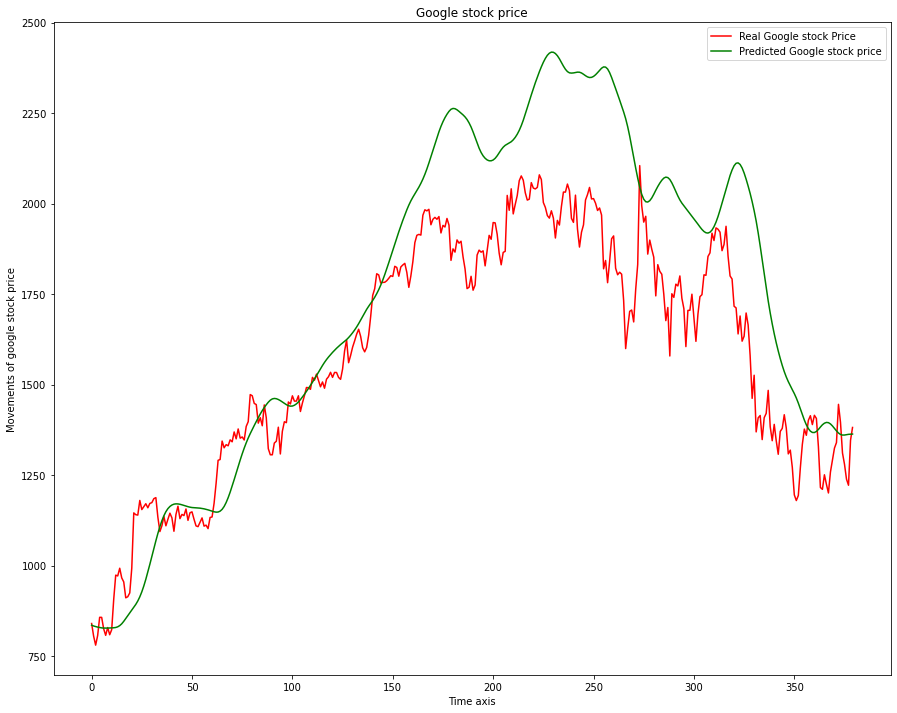

In [118]:
#Visualization
plt.figure(figsize=(15,12))
plt.plot(y_test,color='red',label='Real Google stock Price')
plt.plot(y_pred,color='green',label='Predicted Google stock price')
plt.title('Google stock price')
plt.xlabel('Time axis')
plt.ylabel('Movements of google stock price')
plt.legend()
plt.show()